In [2]:
import random
import numpy as np

In [3]:
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

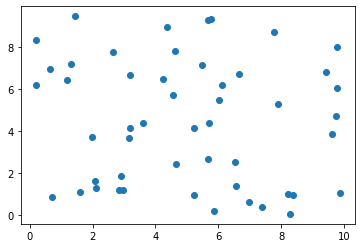

In [4]:
import matplotlib.pyplot as plt
np.random.seed(0)
data = [(np.random.rand() * 10, np.random.rand() * 10) for _ in range(50)]  # Generate random 2D points
k = 5

x_points = [x for x, _ in data]
y_points = [y for _, y in data]
plt.scatter(x_points,y_points)

In [5]:
def k_means(data,k,max_iterations=100):
    data = [[point[0], point[1]] for point in data]
    centroids = random.sample(data,k)

    for _ in range(max_iterations):
        clusters = [[] for _ in range(k)]

        for point in data:
            min_distance = euclidean_distance(point,centroids[0])
            min_distance_idx=0
            for idx in range(1,k):
                distance = euclidean_distance(point, centroids[idx])
                if distance < min_distance:
                    min_distance = distance
                    min_distance_idx=idx
            clusters[min_distance_idx].append(point)

        new_centroids=[]
        
        for cluster in clusters:
            if len(cluster)==0:
                new_centroids.append(centroids[clusters.index(cluster)])
            else :
                sum_x = sum(point[0] for point in cluster)
                sum_y = sum(point[1] for point in cluster)
                new_centroid = (sum_x / len(cluster), sum_y / len(cluster))
                new_centroids.append(new_centroid)
        
        if centroids==new_centroids:
            break
        centroids = new_centroids
    
    return centroids, clusters
                



Centroid 1: (5.502861927363078, 5.769044914062977)
Cluster 1 points:

Centroid 2: (9.155902176406666, 6.1954631021977935)
Cluster 2 points:

Centroid 3: (7.180861033966295, 1.0638775784408787)
Cluster 3 points:

Centroid 4: (2.6445256479051196, 2.281676983749522)
Cluster 4 points:

Centroid 5: (2.6023028871912692, 7.843736405687346)
Cluster 5 points:



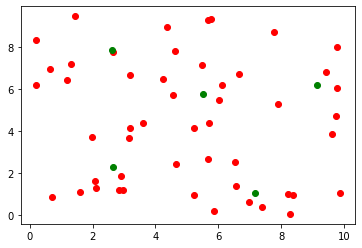

In [6]:
centroids, clusters = k_means(data, k)

c_x = [x for x, _ in centroids]
c_y = [y for _,y in centroids]


plt.scatter(x_points,y_points,c='r')
plt.scatter(c_x, c_y, c='g')
plt.plot()


for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: {centroid}")
    print(f"Cluster {i+1} points:")
    print()